In [1]:
import numpy as np
import pandas as pd

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

from Oinfo import data2gaussian

import sys
import os

sys.path.append('../benchmarking')

sns.set()


/home/laouen.belloli/Documents/git/Oinformation/Oinfo/oinfo_gc.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
def plot_pairwise_distributions(data, x_vars=None, y_vars=None, corner=True):

    sns.pairplot(
        data,
        x_vars=x_vars, y_vars=y_vars,
        kind='hist', plot_kws={'alpha': 0.6}, corner=corner
    )

    plt.tight_layout()
    plt.show()

def plot_variable_pairs(matrix1, matrix2):
    """
    Plots scatter plots for each pair of corresponding variables from two matrices.
    
    Parameters:
    - matrix1 (np.ndarray): First data matrix of size T x N.
    - matrix2 (np.ndarray): Second data matrix of size T x N.
    """
    # Get the number of variables (columns)
    N = matrix1.shape[1]
    
    # Create a figure with subplots in a grid
    fig, axs = plt.subplots(1, N, figsize=(5 * N, 4))  # Adjust subplot size and figure size as needed
    
    # Iterate over each variable
    for i in range(N):
        ax = axs[i] if N > 1 else axs  # Handling both single and multiple subplots
        ax.scatter(matrix1[:, i], matrix2[:, i], alpha=0.5)  # Plot scatter plot of variable i
        ax.set_title(f'Variable {i+1}')
        ax.set_xlabel('Matrix 1 Variable {}'.format(i+1))
        ax.set_ylabel('Matrix 2 Variable {}'.format(i+1))
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

def plot_o_info_bars(data, x, y, hue=None):

    ax = sns.barplot(data=data, x=x, y=y, hue=hue)

    # Print symetrical around zero
    y_vals = [
        abs(bar.get_height())
        for bars in ax.containers
        for bar in bars
    ]
    max_val = np.max(np.abs(y_vals))*1.5
    plt.ylim(-max_val, max_val)
    plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')

    '''
    # Set color based on the value (height) of the bar
    s = sns.color_palette("tab10",1)[0]
    r = sns.color_palette("tab10",4)[-1]
    for bars in ax.containers:
        for bar in bars:        
            bar.set_facecolor(s if bar.get_height() < 0 else r)
    
    legend_handles = [
        Patch(facecolor=r, label='Redundant'),
        Patch(facecolor=s, label='Synergistic')
    ]

    plt.legend(handles=legend_handles)
    '''
    
    plt.tight_layout()
    plt.show()

def plot_o_info_heatmap(df, dim1, dim2, ax, **kargs):

    formatter = FuncFormatter(lambda x, pos: f"{x:.1f}")

    # Pivot the data to get a matrix form suitable for heatmap plotting
    pivot_table = df.pivot(dim1, dim2, "O-information")
    
    # Create the heatmap
    ax = sns.heatmap(
        pivot_table, cmap="vlag", center=0, ax=ax,
        annot=False, fmt=".2f", cbar=True,
        linewidths=.5,
        **kargs
    ) 
    
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

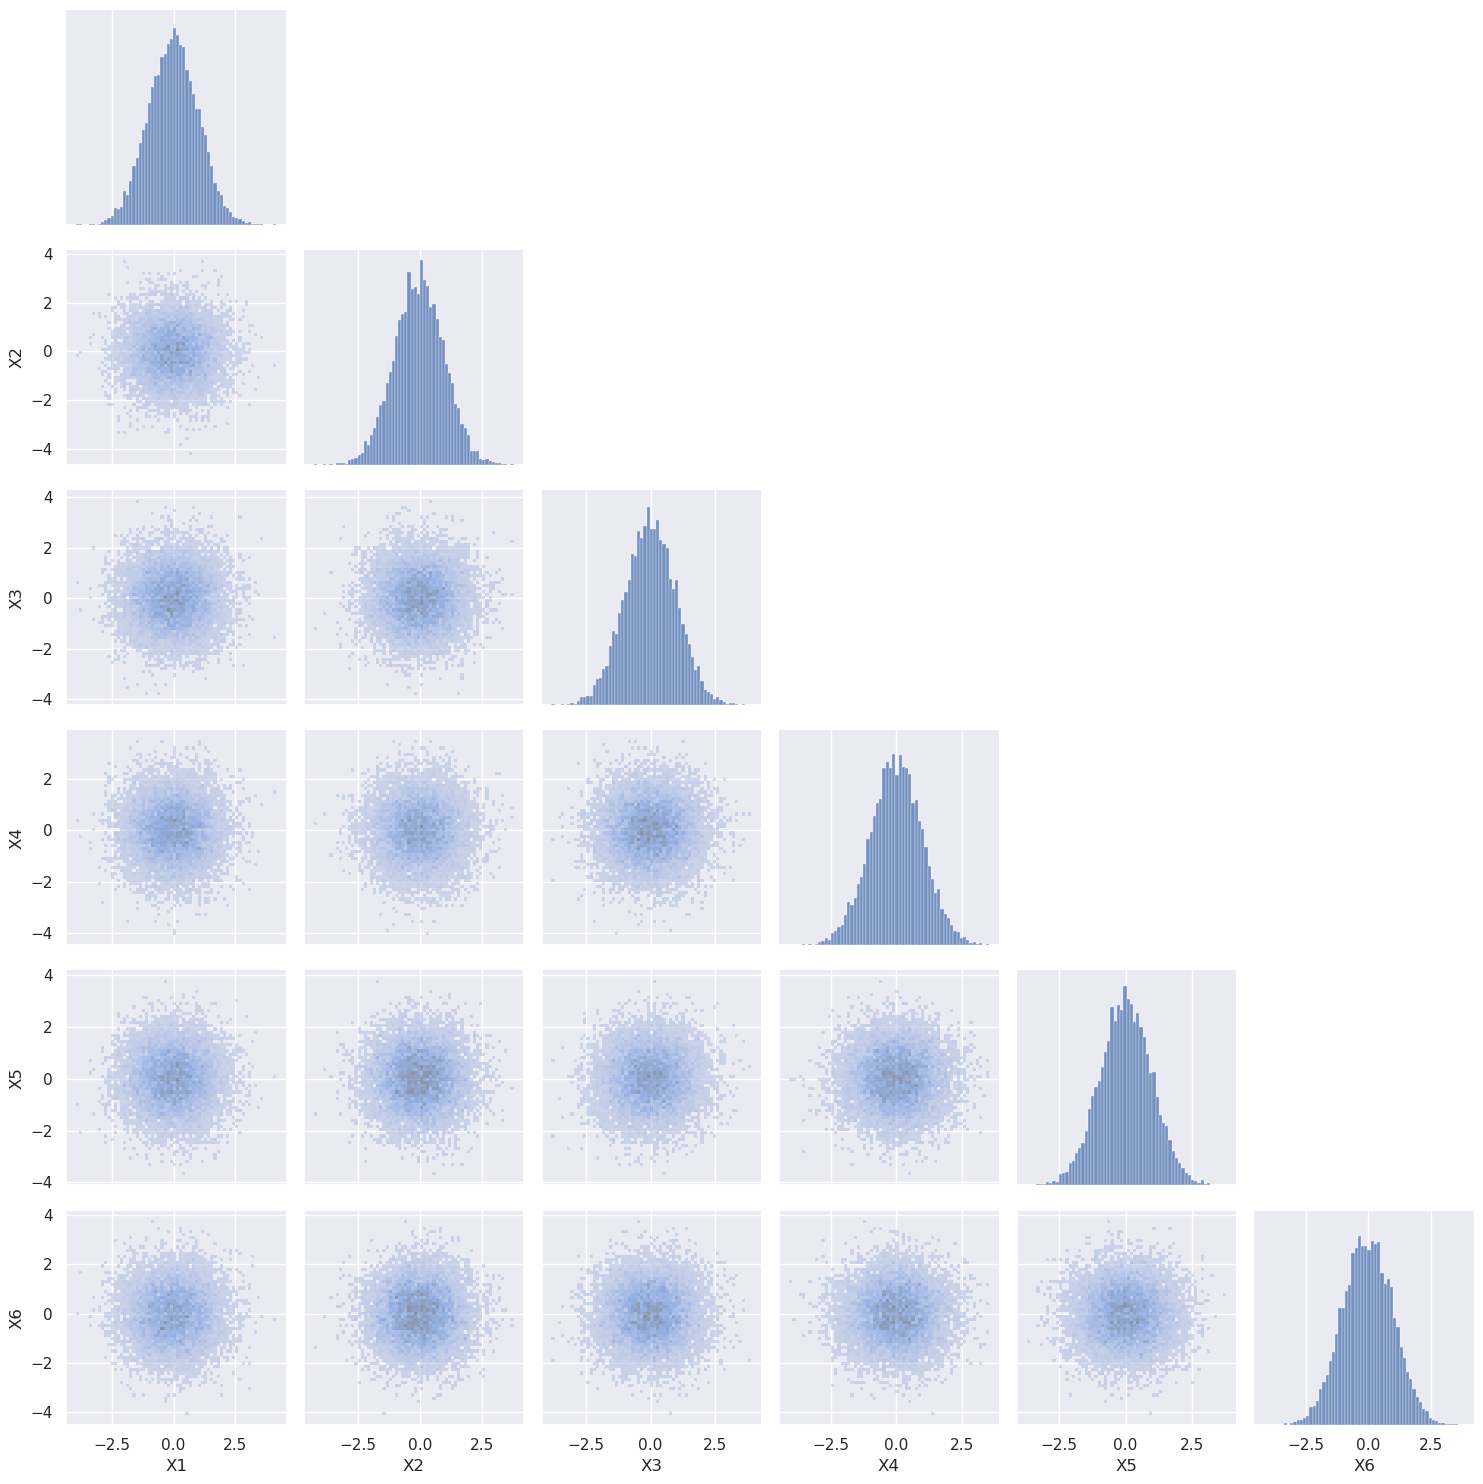

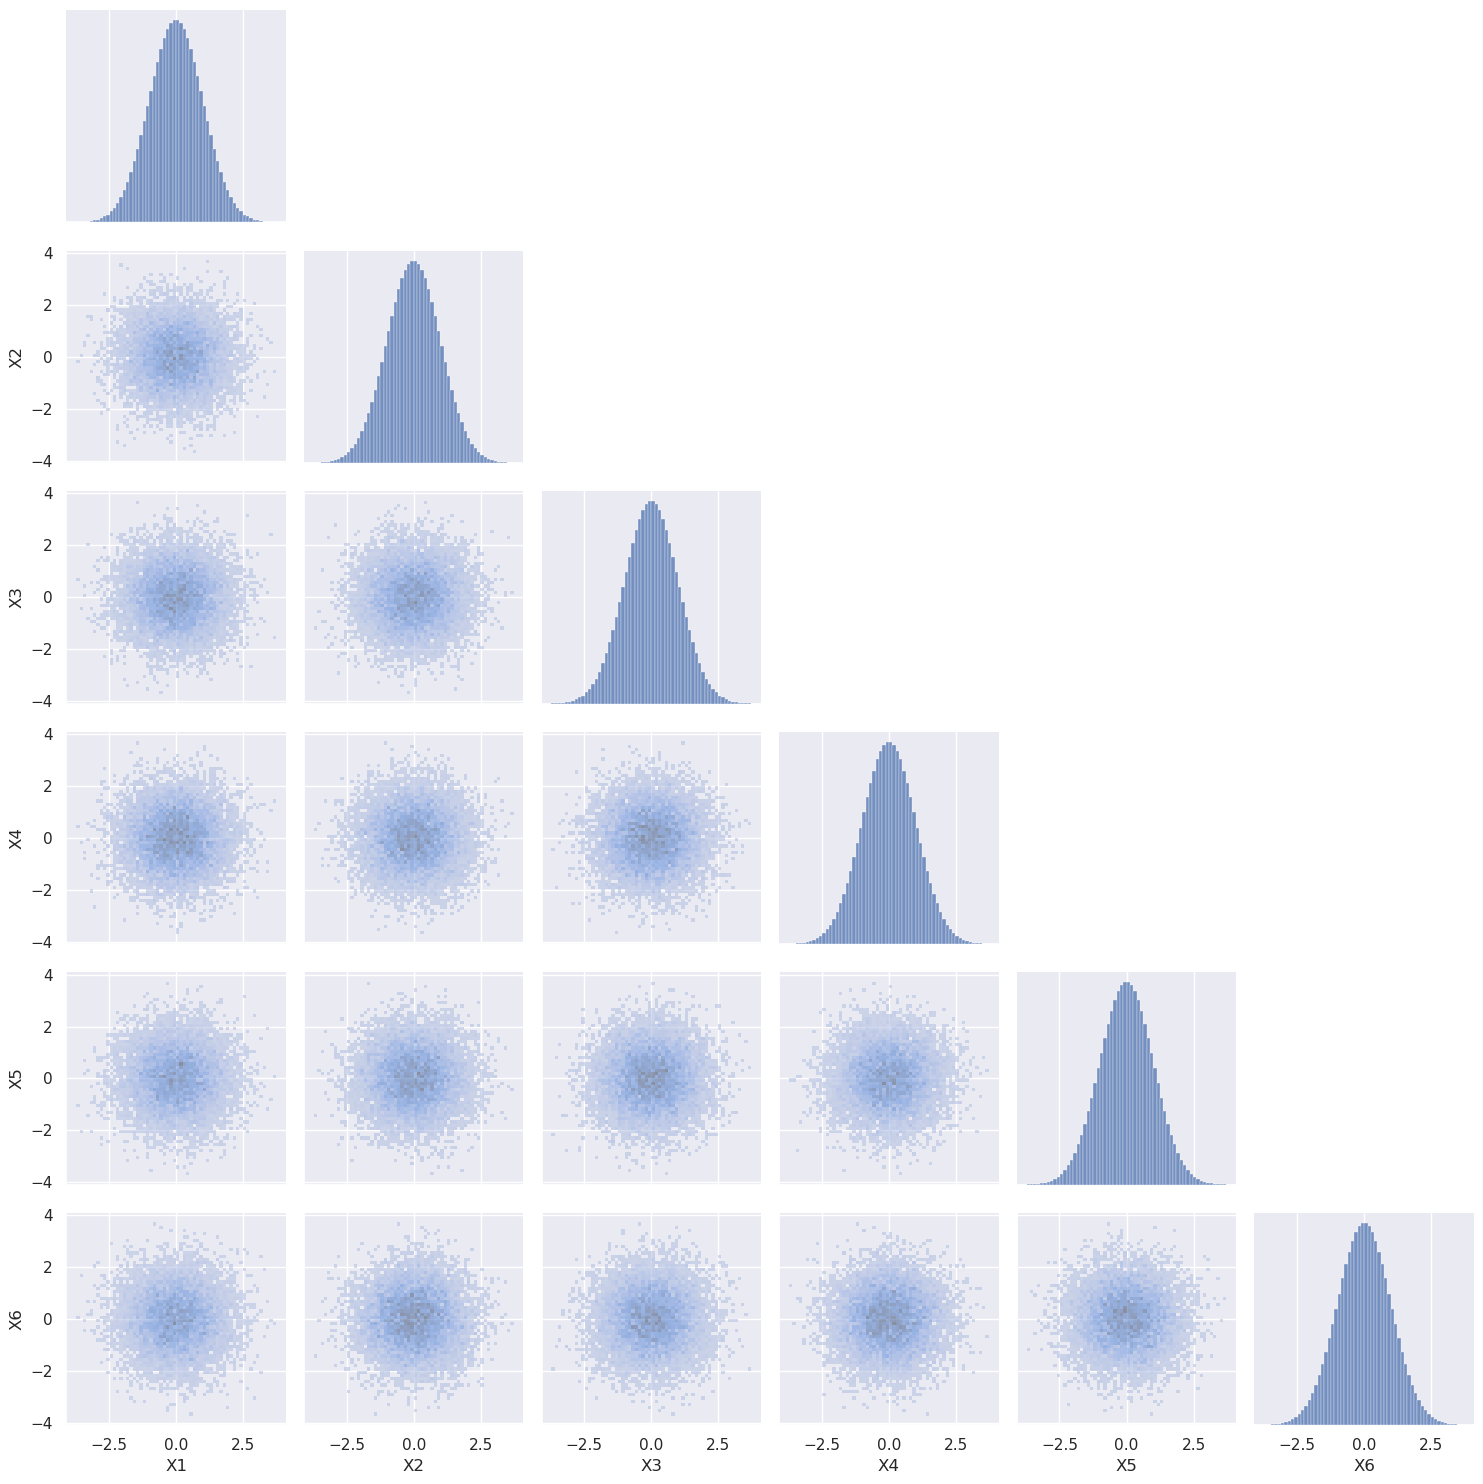

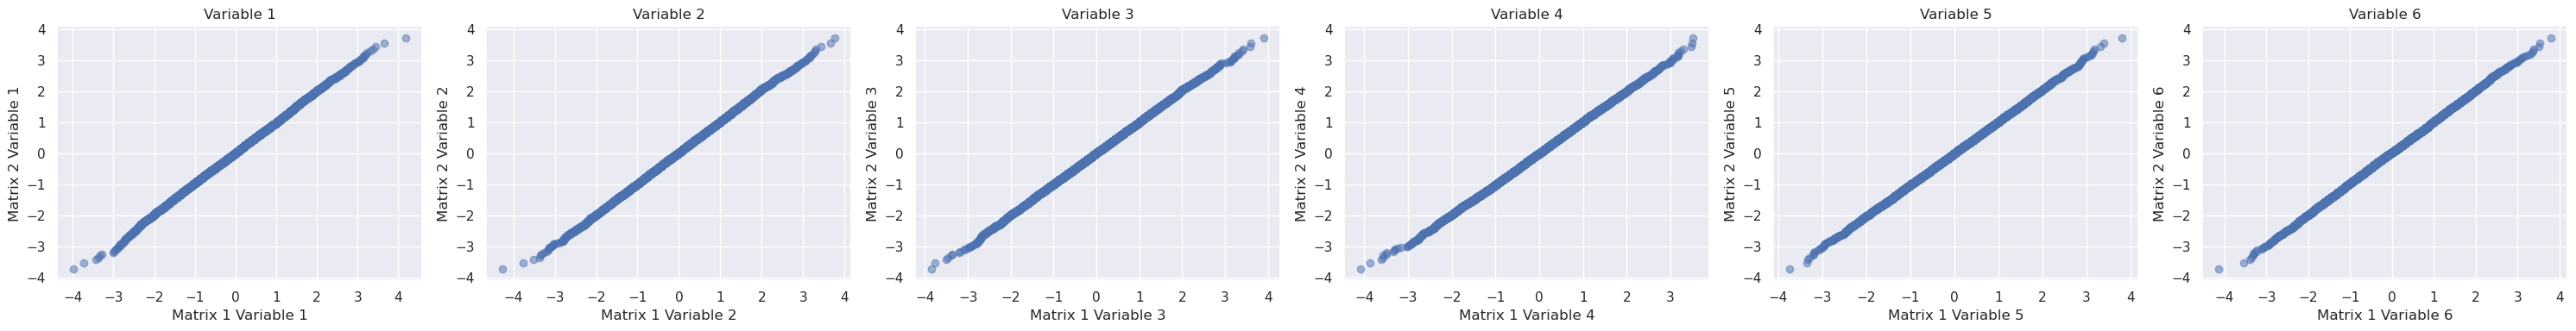

In [5]:
X_cols = [f'X{i}' for i in range(1,7)]

# generate_herarchical_synergy
data = generate_flat_synergy(alpha=.0, beta=.0, gamma=1.0, n=10000)
gaussian_data, covmat = data2gaussian(data[X_cols].values)
gaussian_data = pd.DataFrame(gaussian_data, columns=data[X_cols].columns)


plot_pairwise_distributions(data[X_cols])
plot_pairwise_distributions(gaussian_data)
plot_variable_pairs(data[X_cols].values, gaussian_data.values)

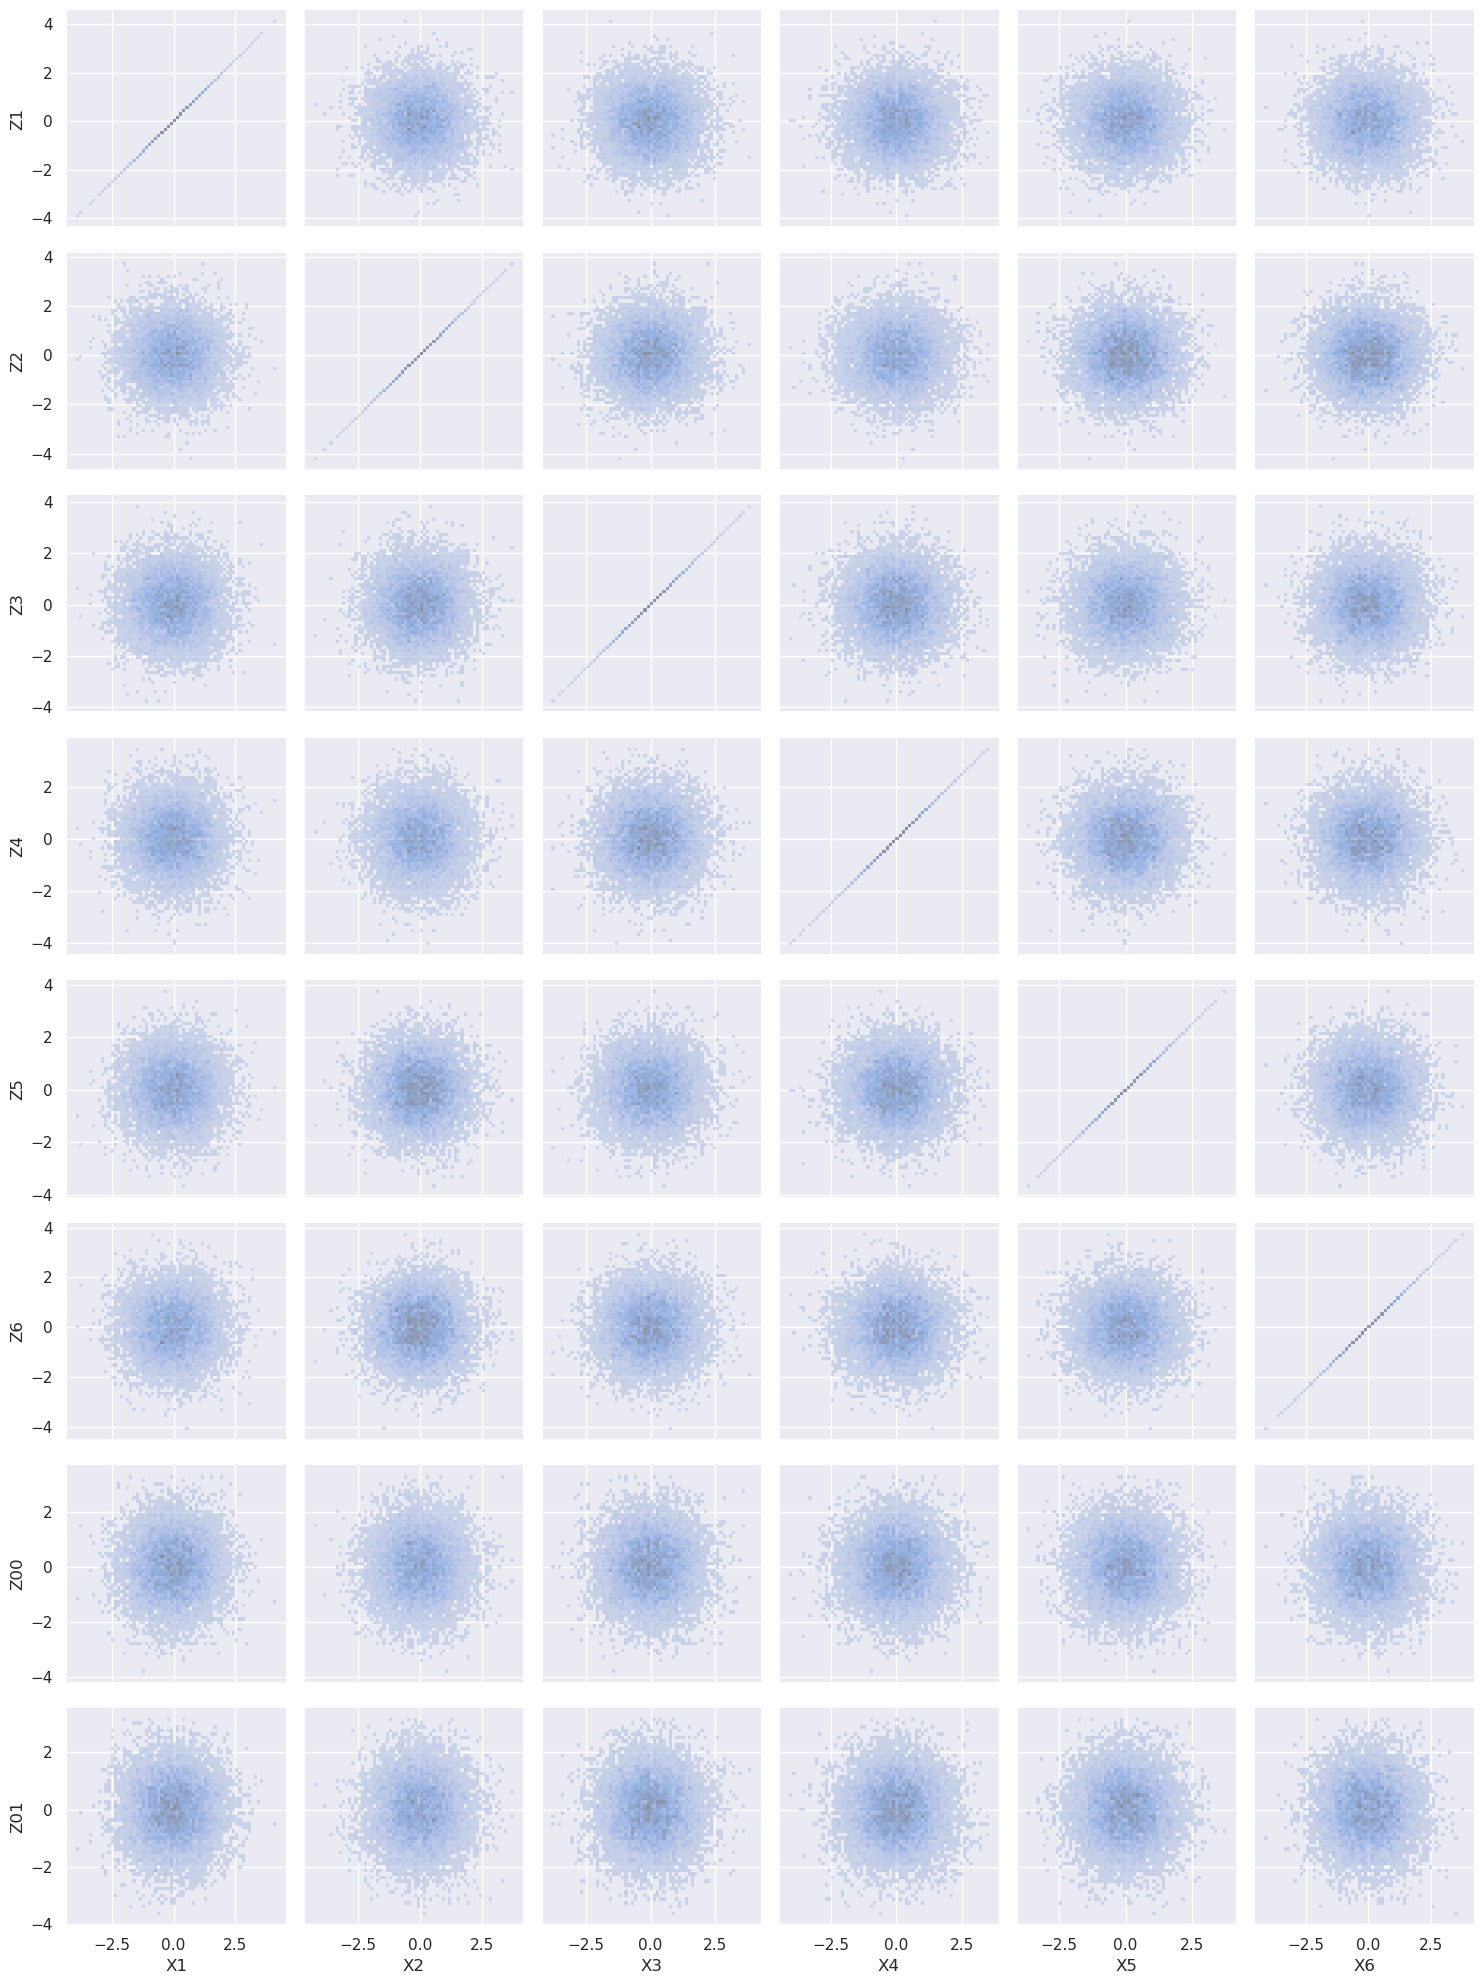

In [6]:
plot_pairwise_distributions(data, x_vars=X_cols, y_vars=[c for c in data.columns if c not in X_cols], corner=False)

/tmp/ipykernel_4079620/4165230571.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot(dim1, dim2, "O-information")


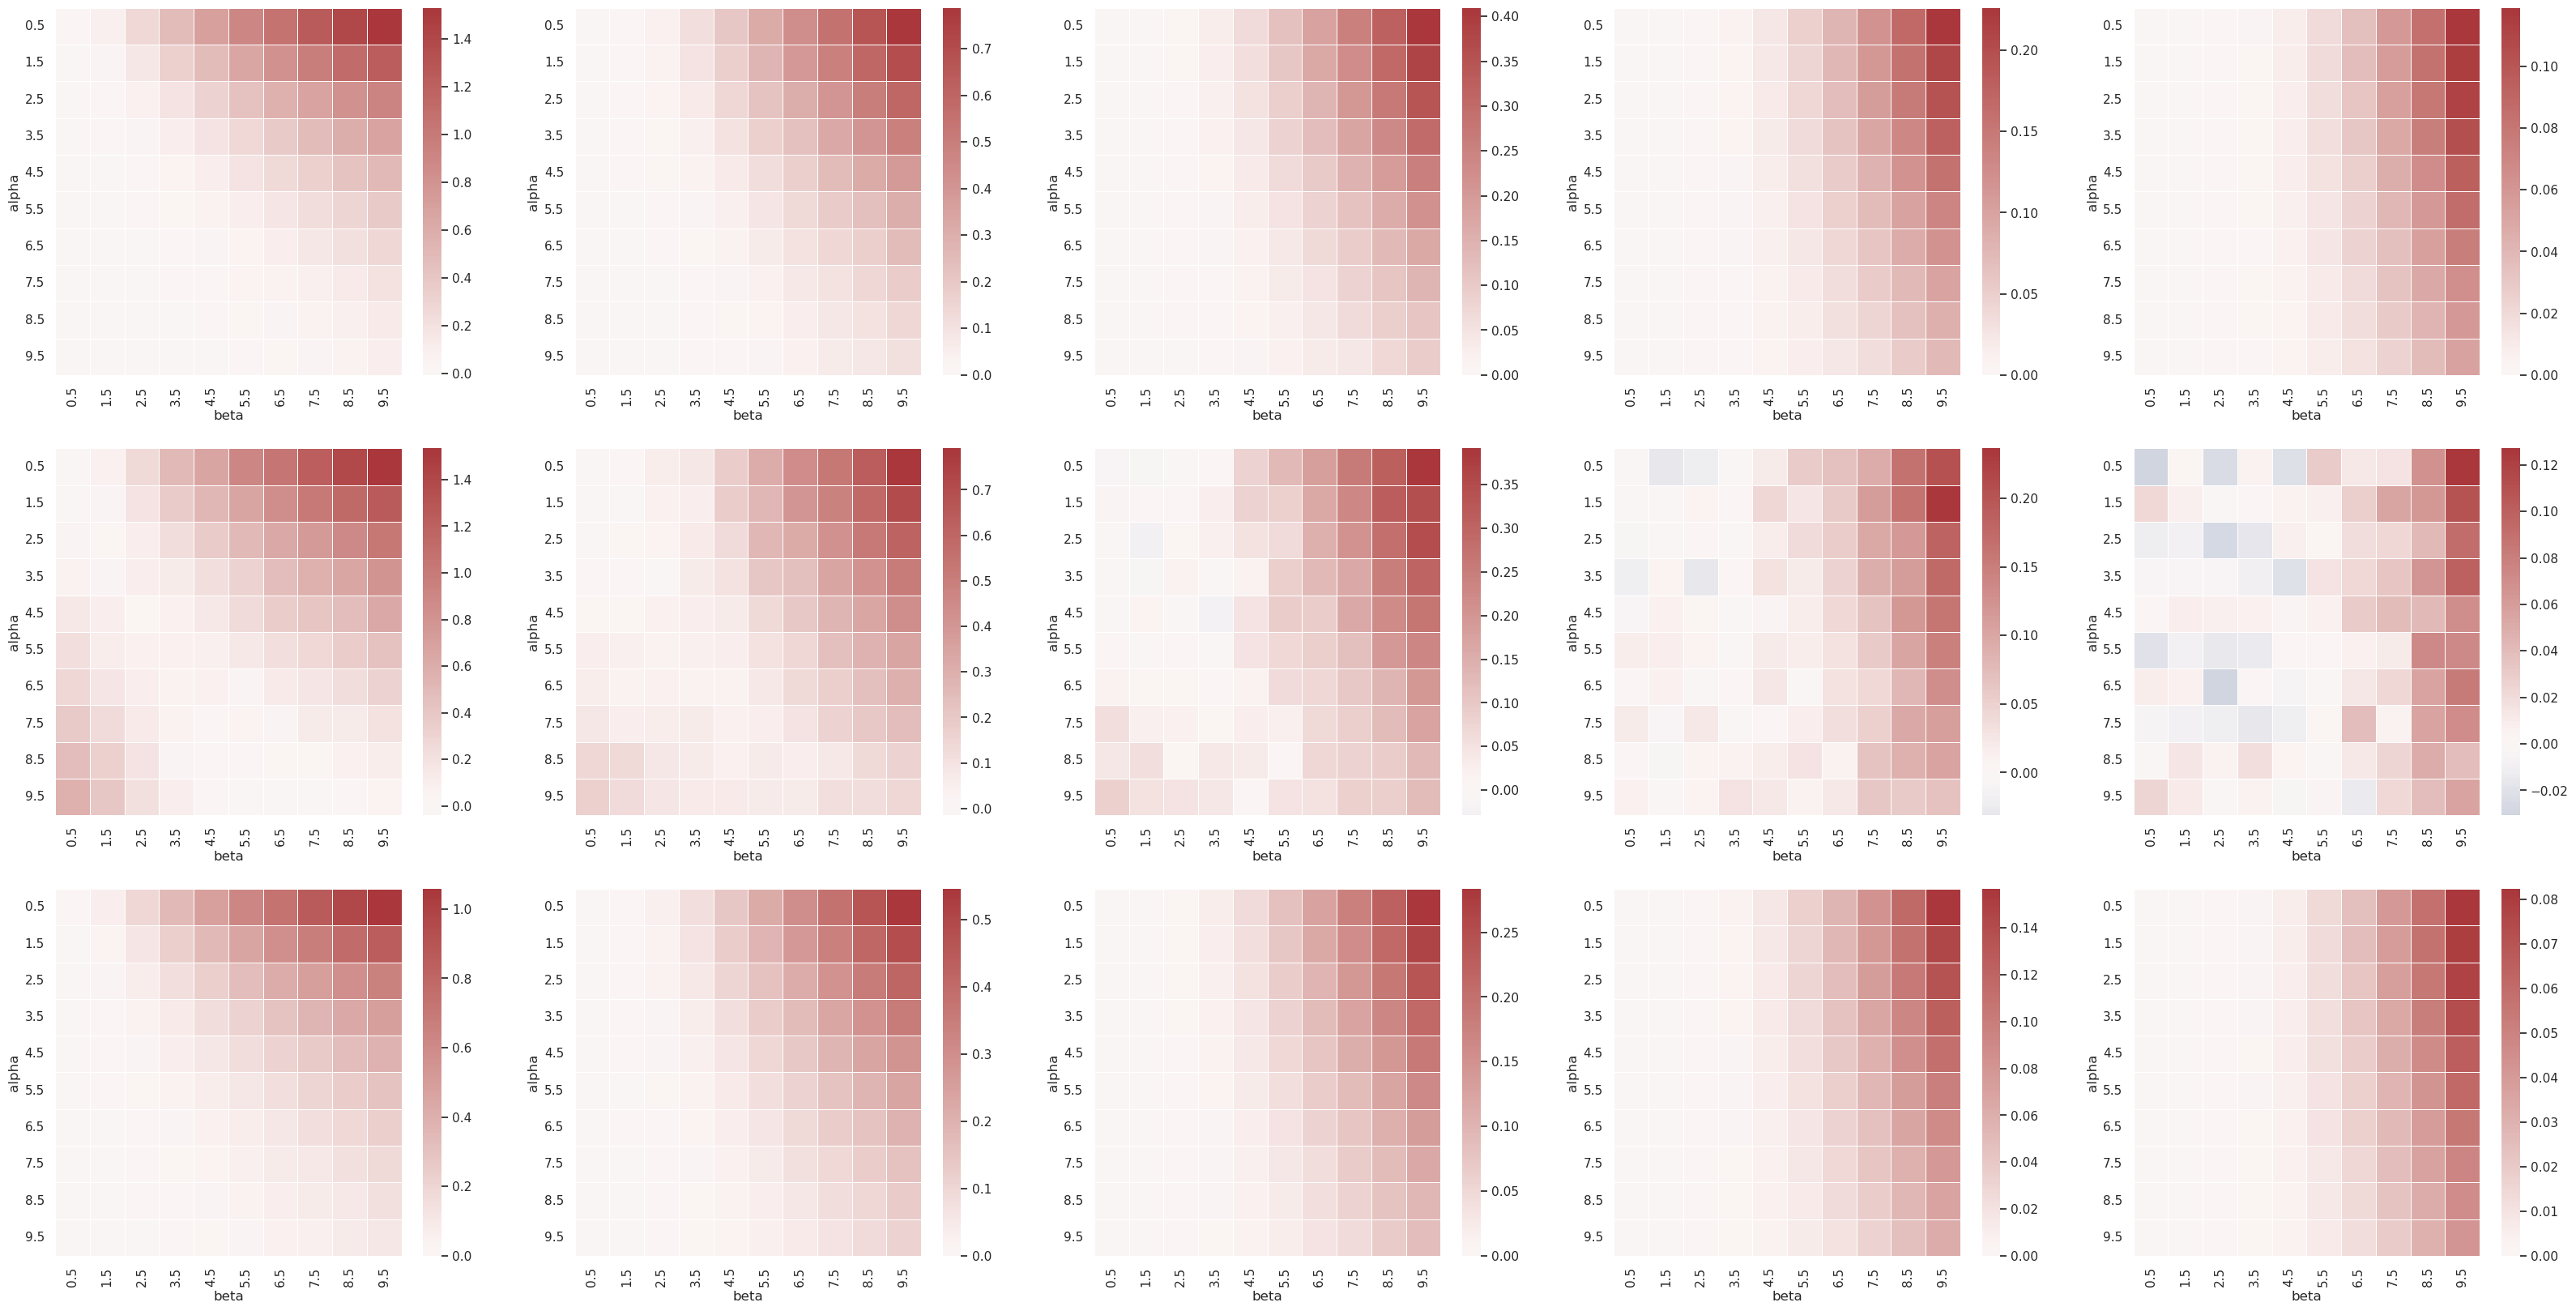

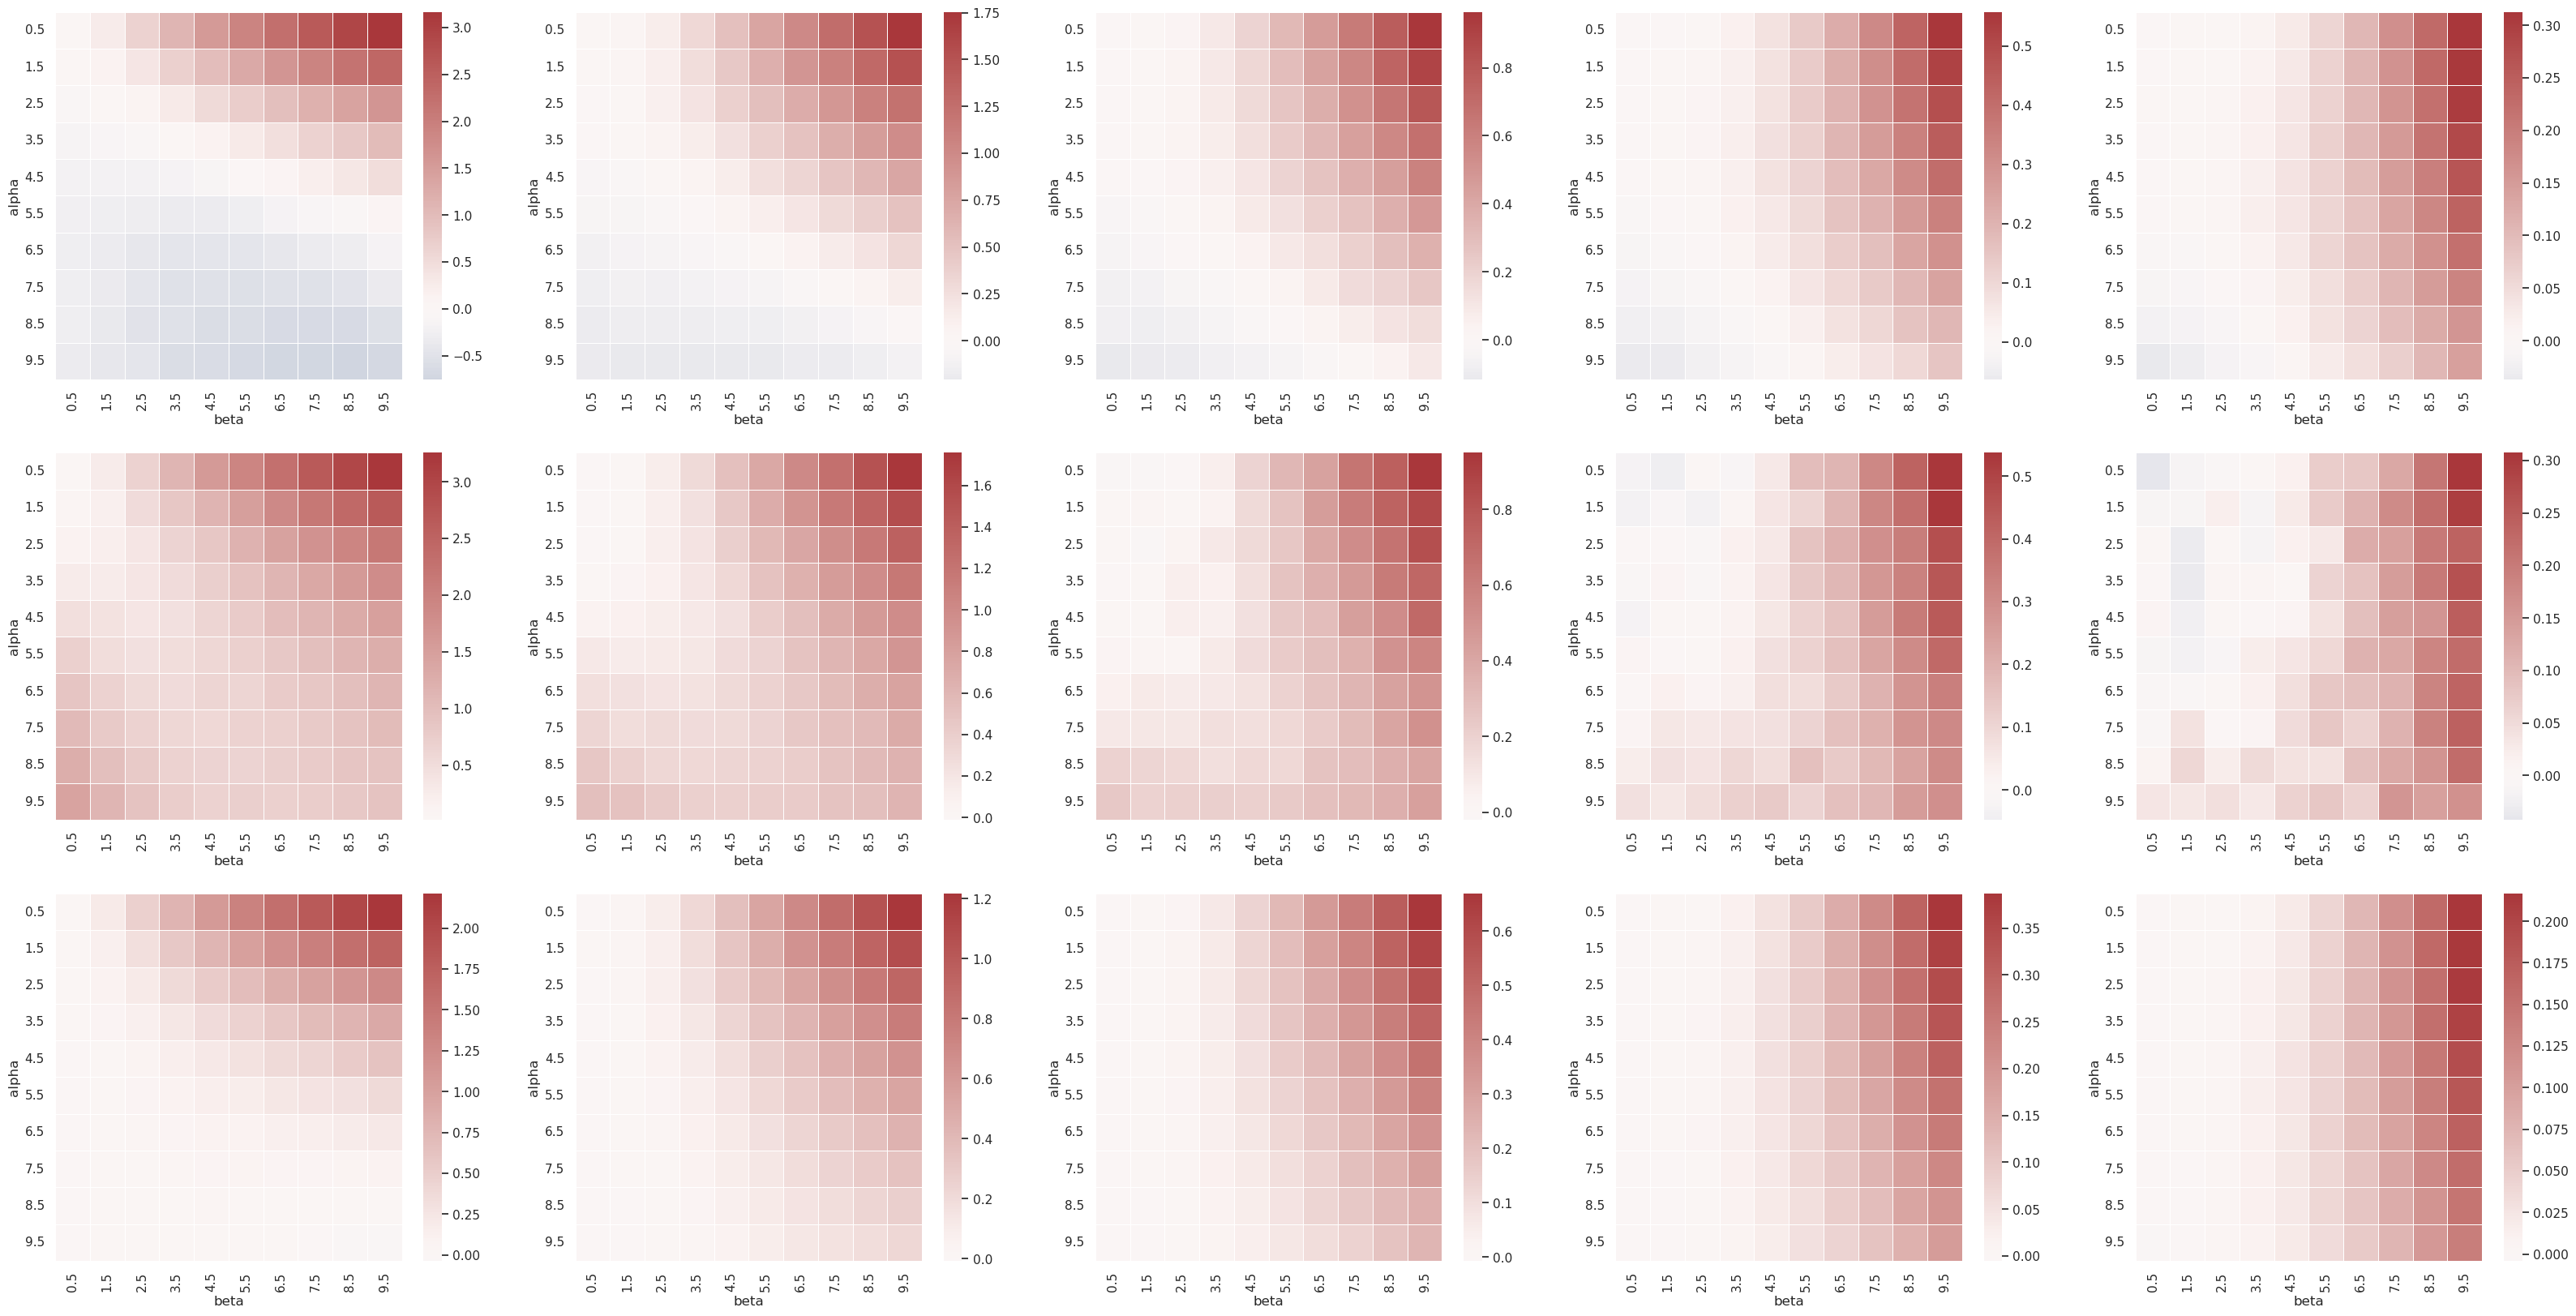

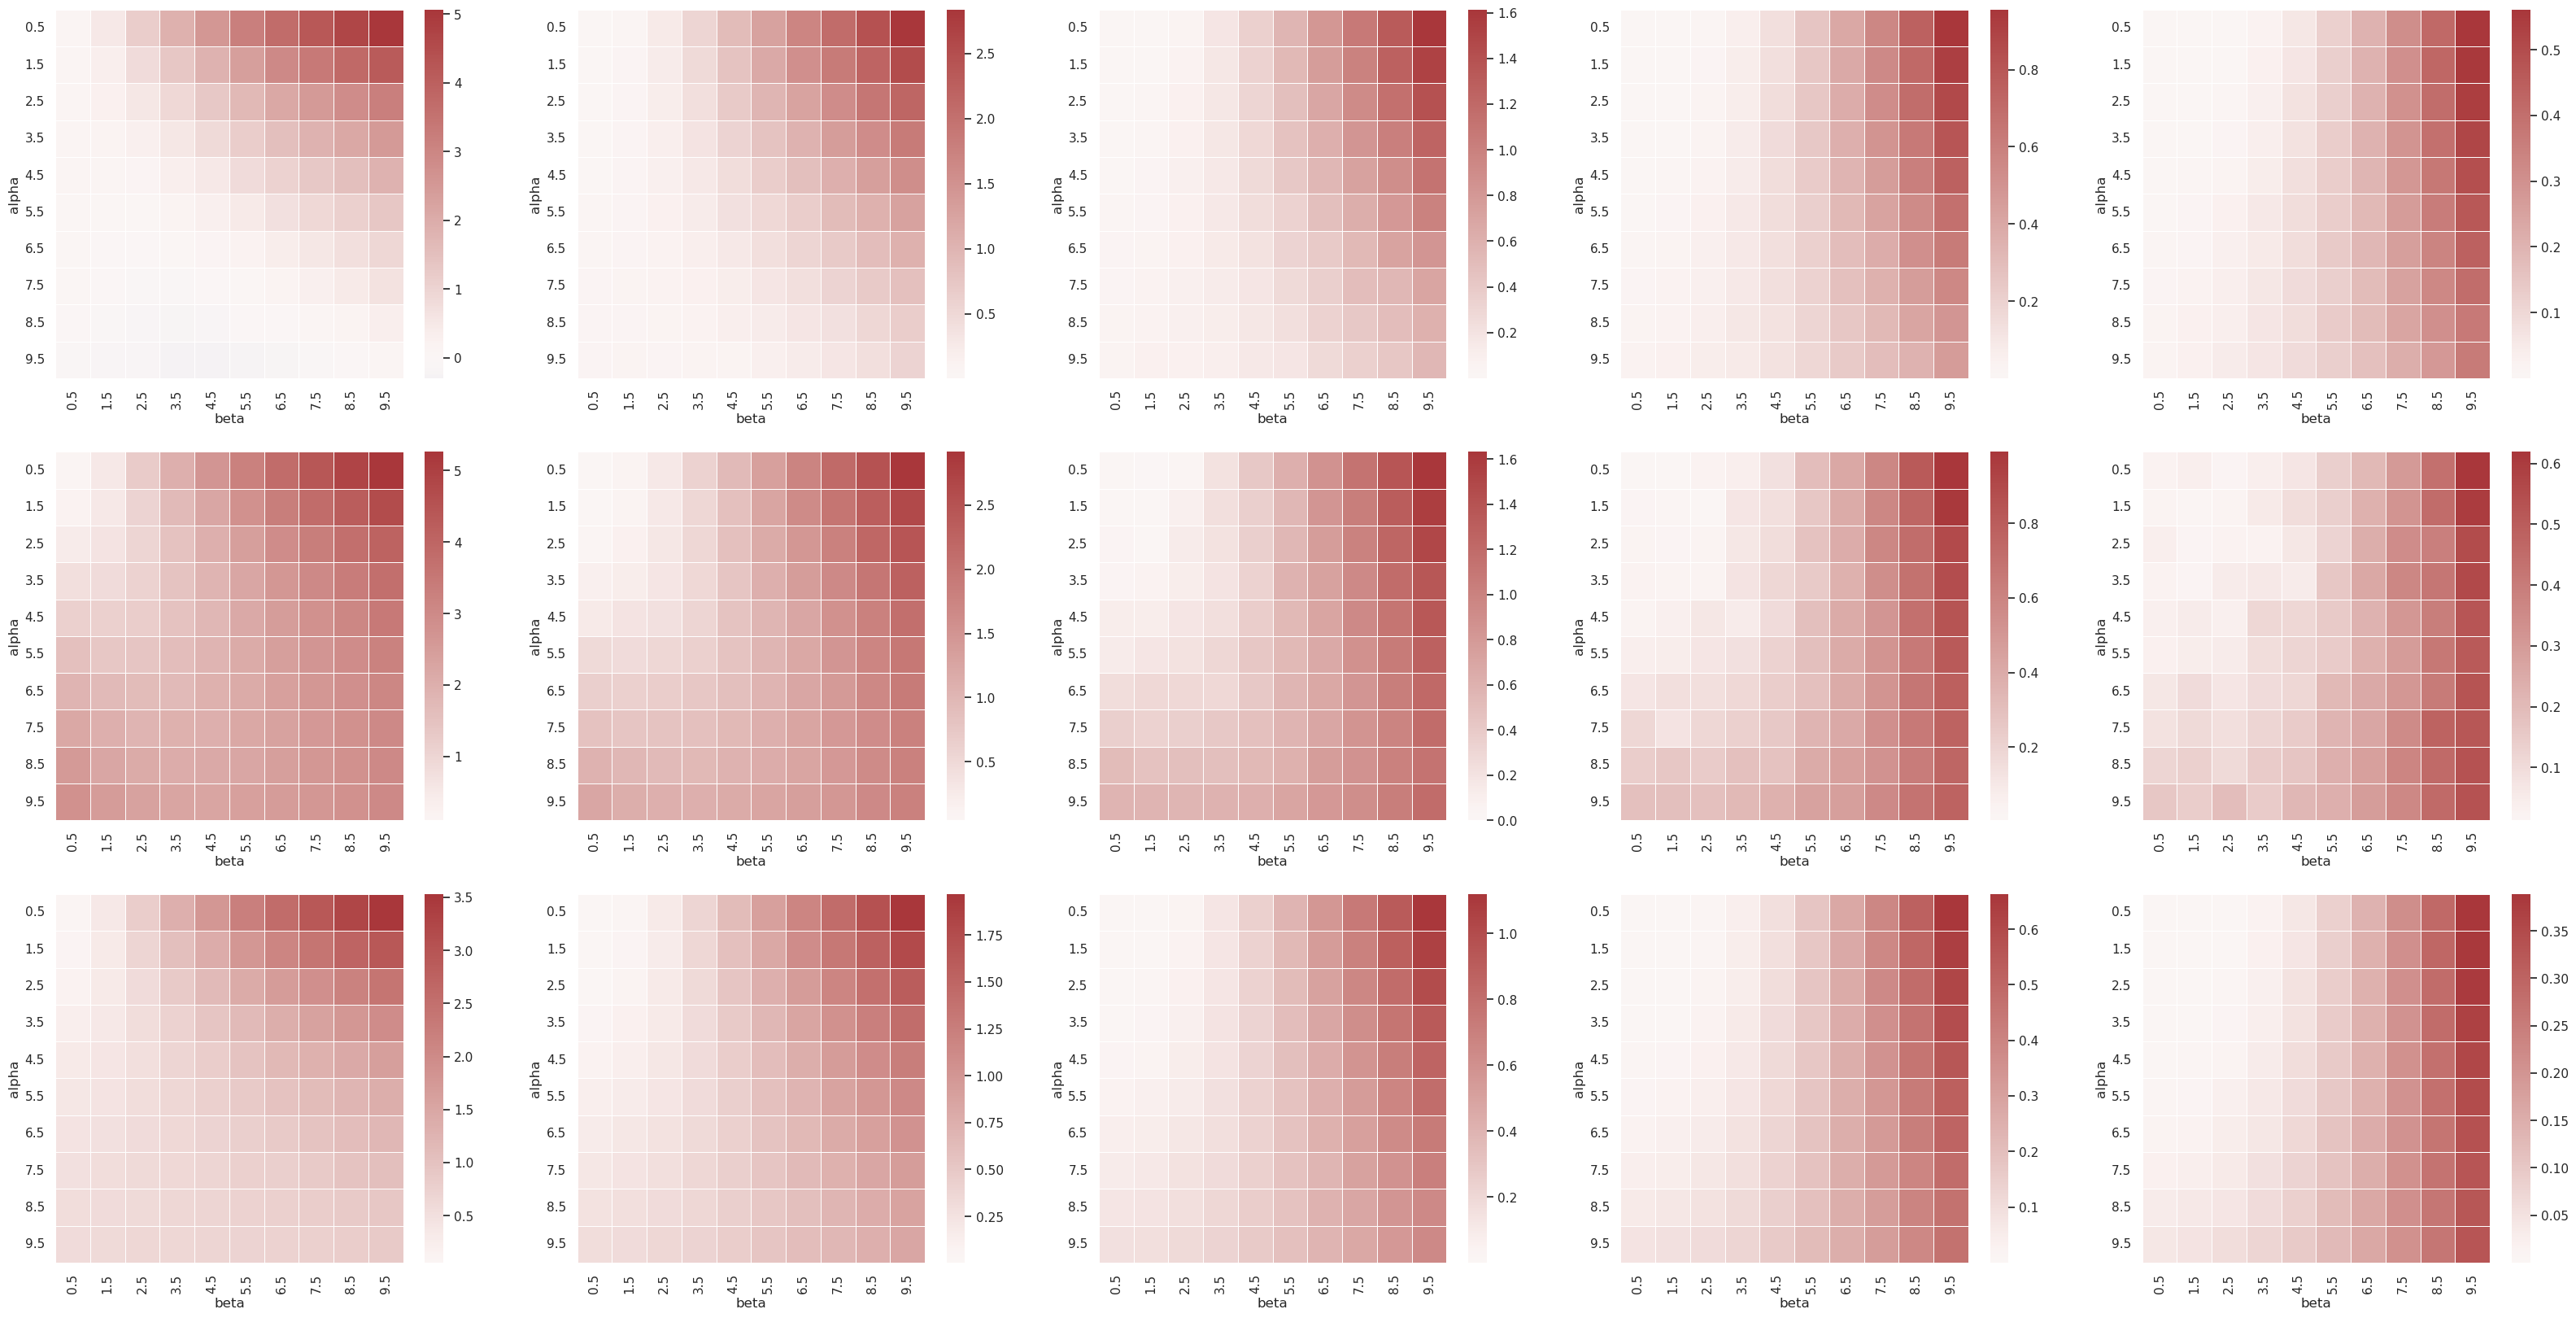

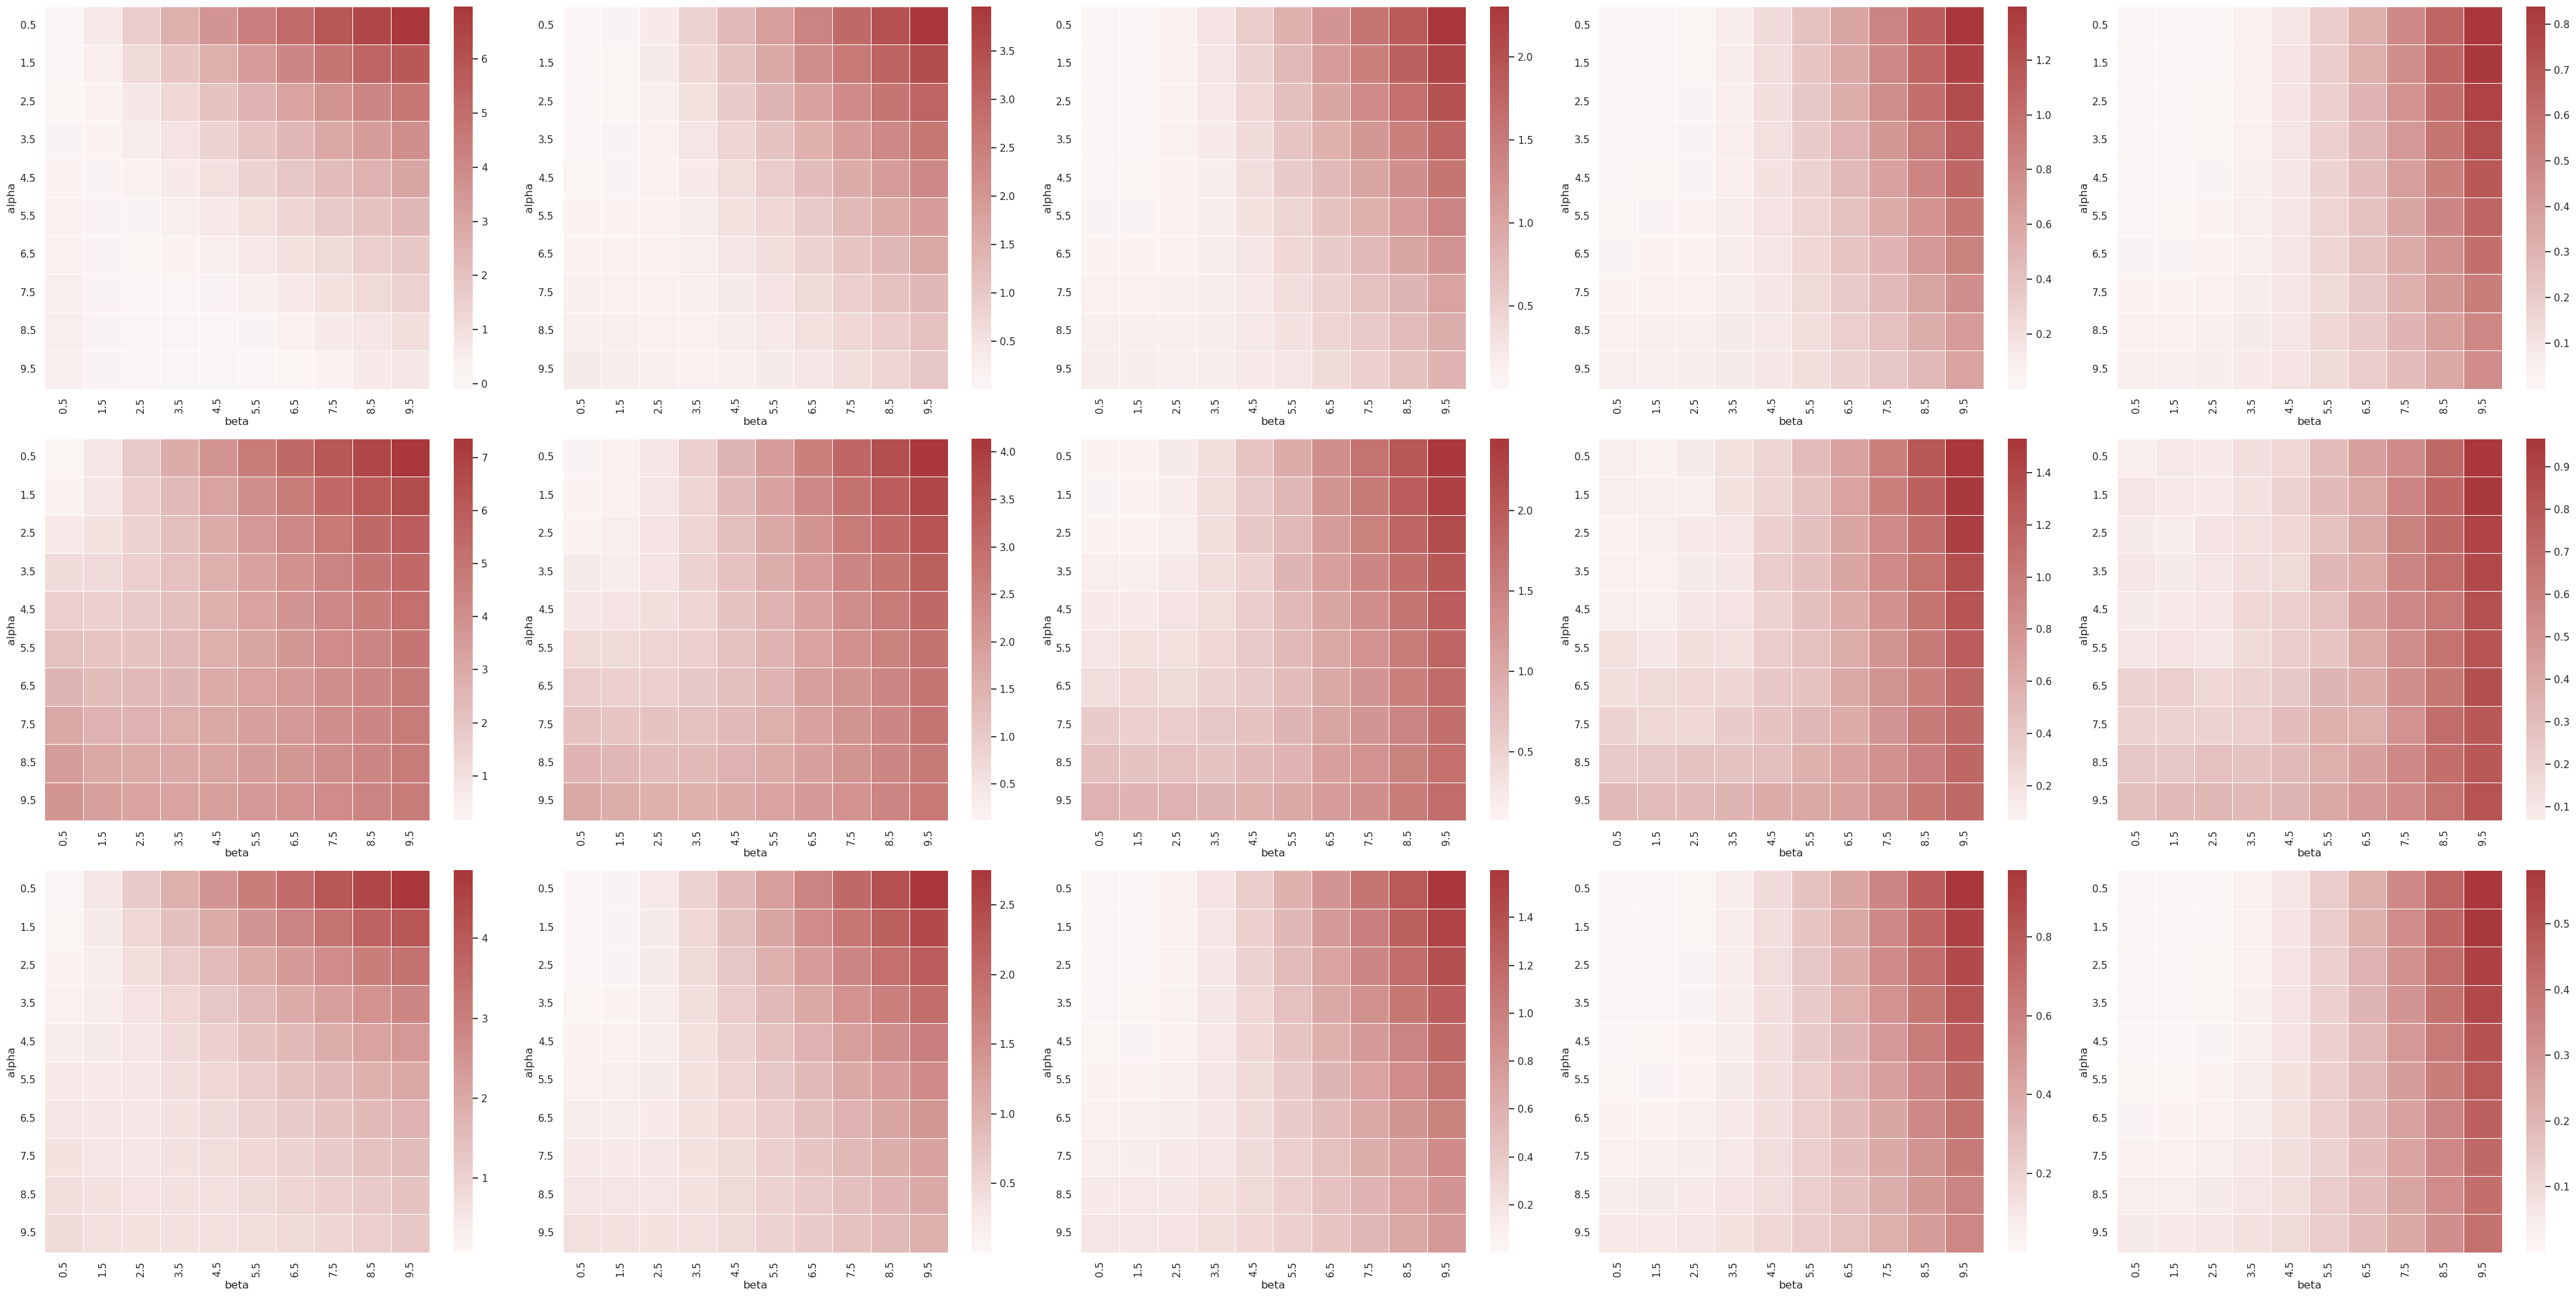

In [3]:
df = pd.read_csv('../benchmarking/flat_system.tsv', sep='\t')

for nplet, df_nplet in df.groupby('n-plet'):

    methods = df_nplet['method'].unique()
    max_o = df_nplet['O-information'].abs().max()

    fig, axes = plt.subplots(len(methods), 5, figsize=(40, 20))

    for i, method in enumerate(methods):
        for j, gamma in enumerate(np.arange(0.2 , 1.05, 0.2)):

            ax = axes[i, j]
            df_temp = df_nplet[((df_nplet['gamma'] - gamma).abs() < 0.01) & (df_nplet['method'] == method)]
            plot_o_info_heatmap(df_temp, 'alpha', 'beta', ax)

plt.tight_layout()
plt.show()

/tmp/ipykernel_4079620/4165230571.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot(dim1, dim2, "O-information")


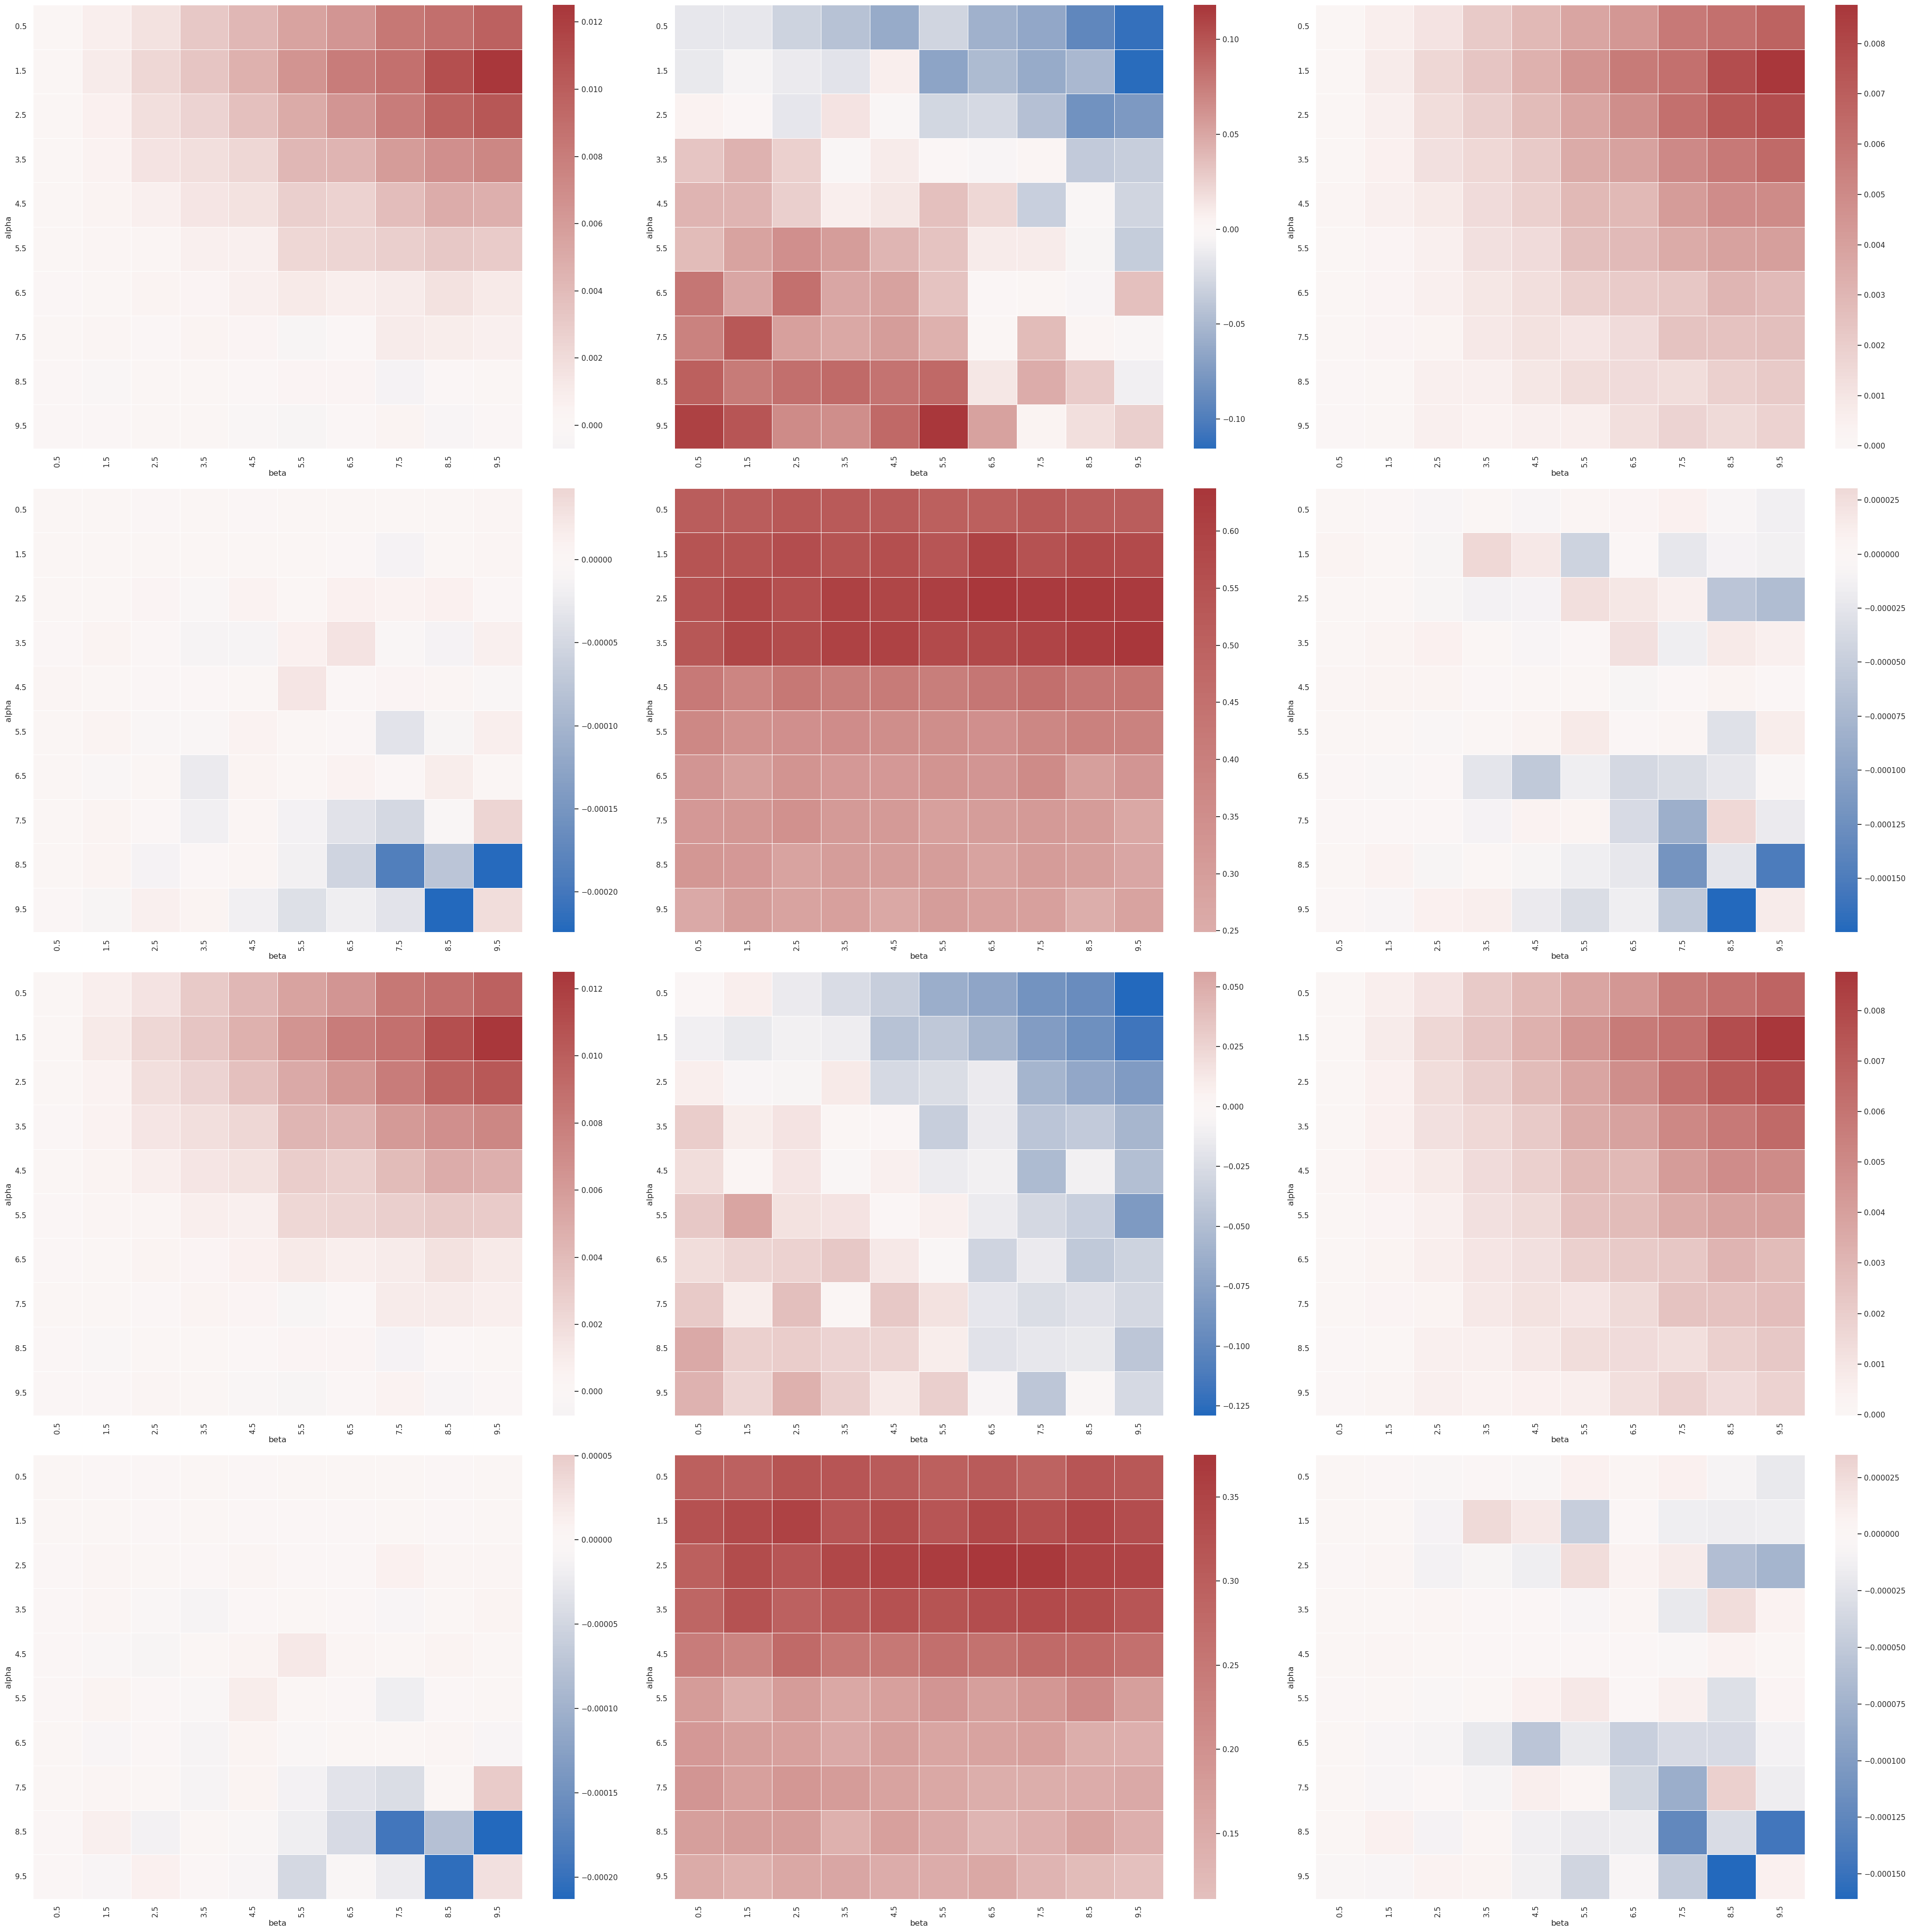

In [5]:
df = pd.read_csv('../benchmarking/hierarchical_system.tsv', sep='\t')

groups = df.groupby('n-plet')

fig, axes = plt.subplots(len(groups), len(methods), figsize=(40, 40))

for i, (nplet, df_nplet) in enumerate(df.groupby('n-plet')):

    methods = df_nplet['method'].unique()
    
    for j, method in enumerate(methods):

        ax = axes[i,j]
        df_temp = df_nplet[df_nplet['method'] == method]
        plot_o_info_heatmap(df_temp, 'alpha', 'beta', ax)

plt.tight_layout()
plt.show()